<center>
    <img src="http://sct.inf.utfsm.cl/wp-content/uploads/2020/04/logo_di.png" style="width:60%">
    <h1> INF285 - Computación Científica </h1>
    <h2> Laboratorio 2</h2>
    <h2> [S]cientific [C]omputing [T]eam </a> </h2>
    <h2> 2025-1</h2>
</center>

In [1]:
import numpy as np

# Funciones

Para la implementación de las preguntas, considere que **solo** tiene a su disposición las siguientes funciones:

* **np.array(x)**: Convierte **x** en un arreglo de NumPy.
* **np.arange(n)**: Para **n** un número entero positivo entrega un vector de largo **n** con números enteros desde 0 a n-1.
* **np.abs(x)**: Entrega el valor absoluto de **x**.
* **np.power(x)**: Evalúa la expresión $x^n$ si **x** y **n** son escalares. En caso de que **x** e **n** sean vectores, deben tener la misma
dimensión y entrega la evaluación elemento a elemento. Si solo uno de los términos es un vector, entrega el vector donde
el término constante se consideró para cada término de vector.
* **np.sqrt(x)**: Entrega la evaluación de la raíz cuadrada no negativa de un vector o escalar **x**.
* **np.sum(x)**: Entrega la suma de los elementos de un vector **x**.
* **solve_palu(A,b)**: Realiza el método PALU para resolver el sistema $A\vec{x}=\vec{b}$ y retorna la solución.
* **jacobi(A,b)**: Realiza el método de Jacobi para resolver el sistema $A\vec{x}=\vec{b}$ y retorna la matriz de iteraciones del vector solución $\vec{x}$.
* **jacobi_Matricial(A, b, n_iter=50)**: Realiza el método iterativo de Jacobi para resolver el sistema $A\vec{x}=\vec{b}$. Retorna una matriz donde cada fila corresponde a una iteración del vector solución $\vec{x}$.

* **np.linalg.norm(A, ord=1)**: Calcula la norma 1 de la matriz **A**, es decir, la suma máxima de valores absolutos por columna.

* **np.linalg.norm(A, ord=np.inf)**: Calcula la norma infinito de la matriz **A**, es decir, la suma máxima de valores absolutos por fila.

* **np.linalg.norm(A, ord=2)**: Calcula la norma 2 (o espectral) de la matriz **A**, que corresponde al mayor valor singular.

* **np.tril(A, k=0)**: Retorna una copia de la matriz **A** con todos los elementos por encima de la k-ésima diagonal puestos a cero. Por defecto, se obtiene la parte triangular inferior estricta con `k=-1`.

* **np.triu(A, k=0)**: Similar a `np.tril`, pero retorna la parte triangular superior de la matriz **A**.

* **np.diag(A)**: Si **A** es una matriz, retorna el vector con sus elementos diagonales. Si **A** es un vector, crea una matriz diagonal con esos elementos.




In [4]:
def solve_triangular(A, b, upper=True):
    n = b.shape[0]
    x = np.zeros_like(b)
    if upper==True:
        #perform backward-substitution
        x[-1] = (1./A[-1,-1]) * b[-1]
        for i in range(n-2, -1, -1):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,i+1:] * x[i+1:]))
    else:
        #perform forward-substitution
        x[0] = (1./A[0,0]) * b[0]
        for i in range(1,n):
            x[i] = (1./A[i,i]) * (b[i] - np.sum(A[i,:i] * x[:i]))
    return x


#permutation between rows i and j on matrix A
def row_perm(A, i, j):
    tmp = np.copy(A[i])
    A[i] = A[j]
    A[j] = tmp


def palu_decomp(A, show=False, print_precision=2):
    N,_ = A.shape
    P = np.identity(N)
    L = np.zeros((N,N))
    U = np.copy(A)
    if show:
        print('Initial matrices')
        print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
        print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
        print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
        print('----------------------------------------')
    #iterating through columns
    for j in range(N-1):
        #determine the new pivot
        p_index = np.argmax(np.abs(U[j:,j]))
        if p_index != 0:
            row_perm(P, j, j+p_index)
            row_perm(U, j, j+p_index)
            row_perm(L, j, j+p_index)
            if show:
                print('A permutation has been made')
                print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
                print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
                print('----------------------------------------')
        #iterating through rows
        for i in range(j+1,N):
            L[i,j] = U[i,j]/U[j,j]
            U[i] -= L[i,j]*U[j]
            if show:
                print('P = '); print(np.array_str(P, precision=print_precision, suppress_small=True))
                print('L = '); print(np.array_str(L+np.eye(N), precision=print_precision, suppress_small=True))
                print('U = '); print(np.array_str(U, precision=print_precision, suppress_small=True))
                print('----------------------------------------')
    np.fill_diagonal(L,1)
    return P,L,U


def solve_palu(A, b, show=False, print_precision=2):
    P,L,U = palu_decomp(A, show, print_precision=print_precision)
    # A.x = b -> P.A.x = P.b = b' -> L.U.x = b'
    b = np.dot(P,b)
    # L.c = b' with c = U.x
    c = solve_triangular(L, b, upper=False)
    x = solve_triangular(U, c)
    return x


def jacobi(A, b, n_iter=50):
    n = A.shape[0]
    #array with solutions
    X = np.empty((n_iter, n))
    #initial guess
    X[0] = np.zeros(n)
    #submatrices
    D = np.diag(A)
    Dinv = D**-1
    R = A - np.diag(D) # R = (L+U)

    for i in range(1, n_iter):
        X[i] = Dinv*(b - np.dot(R, X[i-1]))

    return X


def jacobi_Matricial(A,b, n_iter=50):
    n = A.shape[0]
    #array with solutions
    X = np.empty((n_iter, n))
    #initial guess
    X[0] = np.zeros(n)

    L = np.tril(A,-1)
    U = np.triu(A,1)
    D = np.diag(np.diag(A))
    M = -np.dot(np.linalg.inv(D),L+U)
    b_hat= np.dot(np.linalg.inv(D),b)

    for i in range(1, n_iter):
        X[i] = np.dot(M,X[i-1]) + b_hat

    return X

# Método de Jacobi Matricial
Existen 2 formas alternativas de definir el método de *Jacobi*, y cada una tiene su utilidad propia. La segunda forma alternativa del método de Jacobi se basa en escribirlo en la siguiente forma $\mathbf{x}_{i+1} = M\,\mathbf{x}_i +\widehat{\mathbf{b}}.$
Es decir, la iteración de punto fijo se re-escribe como el producto de la matriz $M$ con el vector $x_i$ más un vector
constante $\widehat{\mathbf{b}}$. La cual se obtiene el siguiente desarrollo:
$$
\begin{align*}
    \mathbf{x}_{i+1} &= D^{-1}(\mathbf{b}-(L+U)\,\mathbf{x}_i)\\
    &= D^{-1}\mathbf{b}-D^{-1}(L+U)\,\mathbf{x}_i\\
    &= -D^{-1}(L+U)\,\mathbf{x}_i+D^{-1}\mathbf{b}
\end{align*}
$$

Entonces, la matriz $M$ para el método de Jacobi corresponde a $M = −D^{−1}(L+U)$ y el vector constante a $\widehat{\mathbf{b}} = D^{−1}\,\mathbf{b}$.

Si definimos el error como en $e_{n+1}= \|x_{n+1} −x_n\|$, obtenemos la siguiente relación:
$$e_{n+1} \leq \|M\|e_n$$

De la desigualdad anterior podemos concluir que si $\|M\| \le 1$, entonces el método reducirá el error, por lo tanto
convergerá. Una posible norma a utilizar es $\|M\|_{∞}$, pero se puede utilizar cualquier norma matricial. En realidad,
si se puede demostrar que para alguna norma matricial $\|M\| \le 1$, entonces el método iterativo anteriormente
descrito convergerá.

# Materiales No Ohmicos

Durante el contexto de este laboratorio, usted pudo visualizar como las leyes de Kirchoff servian como una herramienta para la resolución de circuitos eléctricos.

Un paso clave que se utilizó para poder obtener las corrientes que circulan por el circuito corresponde a la ley de Ohm que asume una relación lineal entre la corriente y el voltaje en una resistencia, con una pendiente igual al valor de la resistencia. Esta ley se cumple solamente para algunos tipos de materiales, los cuales son conocidos como materiales Ohmicos, sin embargo existe otro grupo de materiales llamados No-Ohmicos, donde la relación entre el voltaje y la corriente que circula por una resistencia es no lineal (este tipo de resistencias las puede encontrar en diversas aplicaciones como por ejemplo sensores, elementos de electrónica, descargadores de sobretensión, entre otros)

Una forma de modelar estas resistencias es por medio de la siguiente relación entre su valor y la corriente que circula por esta (puesto que se puede considerar a la corriente como un indicador de la disipación de calor de la resistencia):

$$R(I)=R_i\sqrt[3]{I^2}$$

Ahora considere el circuito de la figura, donde las resistencias estan hechas de materiales No-Ohmicos y tienen los siguientes valores:
$(R_1, R_2, R_3, R_4, R_5) = (20,10,20,20,10)$

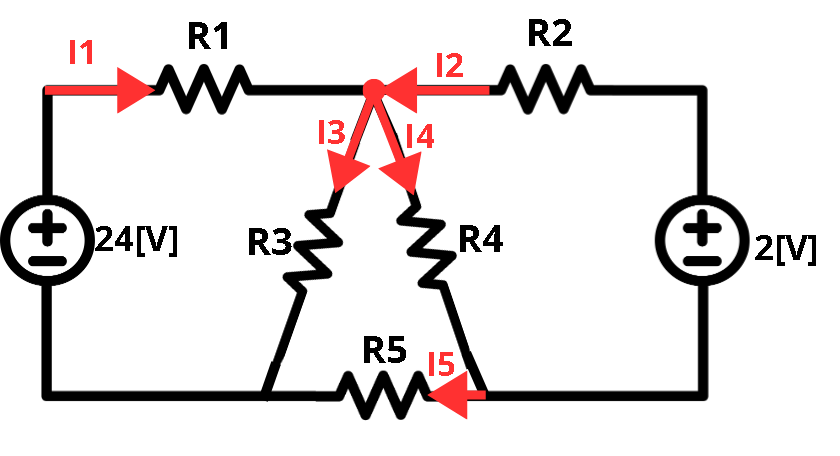

Al realizar el analisis de mallas y nodos por medio de las leyes de Kirchoff se obtienen las siguientes ecuaciones:

$$R_1 \sqrt[3]{I_{1}^2} I_1+ R_3 \sqrt[3]{I_{3}^2} I_3 = 24$$
$$R_2 \sqrt[3]{I_{2}^2} I_2+ R_4 \sqrt[3]{I_{4}^2} I_4 = 2$$
$$-R_3 \sqrt[3]{I_{3}^2} I_3+ R_4 \sqrt[3]{I_{4}^2} I_4 + R_5 \sqrt[3]{I_{5}^2} I_5= 0$$
$$I_1 + I_2 -I_3 - I_4 = 0$$
$$-I_2 - I_4 + I_5 =0$$




# Preguntas

1. **(10 puntos)** Como se ha observado en el contexto anterior, es posible utilizar métodos para resolver sistemas de ecuaciones lineales y así determinar los valores de corrientes $I$ en una red eléctrica. Suponga ahora que los valores de las fuentes del sistema cambian constantemente, mientras que la estructura del circuito permanece fija. ¿Cuál de los métodos conocidos recomendaría utilizar en este caso y por qué?
*hint: Think about what changes in the system of equations*

Si los valores dentro de nuestra matriz A cambiasen constantemente, pero se mantuviese la estructura, notaríamos que PALU no es una buena opción, dado que necesitaríamos recalcular nuestras L para cada cambio de valores. Esto nos deja con el método de Jacobi, que mediante una buena aproximación inicial podría obtener el resultado de manera óptima con un menor costo que PALU, solo deberíamos fijarnos en las restricciones presentes en Jacobi.

2. **(10 puntos)** Explique por qué los métodos implementados anteriormente (PALU y Jacobi) no funcionarían para resolver el sistema de ecuaciones asociado al modelo propuesto, y en cambio el método de *Newton* en $\mathbb{R}^{n}$ sí lo haría, fundamente y discuta el por qué.

Esto se debe a que ambos deben cumplir ciertas condiciones que son necesarias para su funcionamiento, ya sea que su determinante sea distinto de 0 o que la matriz sea simétrica y positiva. En cambio, el método de Newton busca adaptarse para evitar esos problemas, obteniendo así un resultado fiable.

3. **(25 puntos)** implemente la función $\mathbf{F}(\mathbf{p})$ tal que $\mathbf{F}(\mathbf{p}) = \mathbf{0}$, correspondiente a la función $\mathbf{F}(\mathbf{x})$ del método de *Newton*, para el sistema de ecuaciones asociado al circuito entregado.

In [80]:
def F(x):
    """
    input:
    x         : (float) Initial Guess x

    output:
    F:(float) Vector F(x) = 0
    """
    ###### acá va su código ######

    I1, I2, I3, I4, I5 = x
    R1, R2, R3, R4, R5 = 20, 10, 20, 20, 10

    

    ###### acá va su código ######
    return f

4. **(25 puntos)** implemente la función **check_jacobi(A)** la cual dada una matríz A, verifica si es factible utilizar el método de *Jacobi Matricial*.
*Hint: Think about the condition of this method.*

In [17]:
def check_jacobi(A):
    """
    input:
    A         : (float) Matrix to determinate diagonal dominance.

    output:
    check_jacobi:(bool) Returns True if the Jacobi method is feasible; otherwise, returns False.
    """
    ###### acá va su código ######
    
    check_jacobi = False
    # Obtenemos la matriz M (nuestra condición)
    L = np.tril(A,-1)
    U = np.triu(A,1)
    D = np.diag(np.diag(A))
    M = -np.dot(np.linalg.inv(D),L+U) 

    # Comprobamos si M cumple la condición
    m_n = np.linalg.norm(M, ord=2)
    if(m_n <= 1):
        check_jacobi = True
        
    ###### acá va su código ######

    return check_jacobi

5. **(30 puntos)** Implemente la función ``adaptative_Newton(A,b,iter=50,tol=1e-6)`` que realiza el método iterativo de *Newton* para $\mathbb{R}^n$, resolviendo el sistema de ecuaciones lineales en cada iteración utilizando *Jacobi Matricial* si es que se asegura la convergencia de este método, y PALU en otro caso, para ello considere que el Jacobiando de F es el siguiente:

$$
J =
\begin{bmatrix}
\frac{5}{3} R_1 |I_1|^{2/3} & 0 & \frac{5}{3} R_3 |I_3|^{2/3} & 0 & 0 \\
0 & \frac{5}{3} R_2 |I_2|^{2/3} & 0 & \frac{5}{3} R_4 |I_4|^{2/3} & 0 \\
0 & 0 & -\frac{5}{3} R_3 |I_3|^{2/3} & \frac{5}{3} R_4 |I_4|^{2/3} & \frac{5}{3} R_5 |I_5|^{2/3} \\
1 & 1 & -1 & -1 & 0 \\
0 & -1 & 0 & -1 & 1
\end{bmatrix}
$$

In [21]:
def JacF(x):
    I1, I2, I3, I4, I5 = x
    R1, R2, R3, R4, R5 = 20, 10, 20, 20, 10

    def dfdI(I, R):
        return (5/3) * R * np.power(abs(I), 2/3)

    J_matrix = np.array([
        [dfdI(I1, R1),           0, dfdI(I3, R3),           0,           0],
        [          0, dfdI(I2, R2),           0, dfdI(I4, R4),           0],
        [          0,           0, -dfdI(I3, R3), dfdI(I4, R4), dfdI(I5, R5)],
        [          1,           1,          -1,         -1,           0],
        [          0,          -1,           0,         -1,           1]
    ])

    return J_matrix

In [ ]:
def adaptative_Newton(x0, n, iter=50, tol=1e-6):
    """
    input:
    x0    : (ndarray) Initial guess for the pressure vector.
    n     : (int) Number of nodes (length of the pressure vector).
    iter  : (int) Maximum number of iterations for the Newton-Raphson method. Default is 50.
    tol   : (float) Tolerance for convergence. Default is 1e-6.

    output:
    x     : (ndarray) ApproxiAmated solution vector after convergence of the Newton-Raphson method.
    """
    ###### acá va su código ######

    i = 0
    # Obtenemos la matriz jacobiana 
    J = JacF(x0)
    while(i < iter):
        # Checkeamos si es posible usar Jacobi
        jaco = check_jacobi(J)
        if jaco:
            x = jacobi_Matricial(J, x0)
        # Si no es posible usar Jacobi
        else:
            x = solve_palu(J, x0)
        # Salimos del loop si alcanzamos la tolerancia establecida
        if(all(x0) - all(x) < tol):
            break
        # Obtenemos la siguiente matriz jacobiana y guardamos el valor anterior de x
        J = JacF(x)
        x0 = x
        i += 1
        
    ###### acá va su código ######
    return x

*Ejecute siguiente Celda para comprobar sus resultados*

In [77]:
adaptative_Newton(np.array([1., 1.0, 1.0, 1.0, 1.0]),.1,0.1,5)

array([-0.23125,  1.015  ,  0.26125, -0.4775 ,  1.5375 ])